<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# *Data Science Unit 4 Sprint 2 Assignment 1* Jonatan Rivera

Use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

In [91]:
import tensorflow as tf 

## Load Your Data

In [94]:
import numpy as np
import tensorflow as tf 

data = np.load('quickdraw10.npz')
X = data['arr_0']
y = data['arr_1']

print(X.shape)
print(y.shape)

(100000, 784)
(100000,)


In [95]:
class_names = ['apple',
 'anvil',
 'airplane',
 'banana',
 'The Eiffel Tower',
 'The Mona Lisa',
 'The Great Wall of China',
 'alarm clock',
 'ant',
 'asparagus']

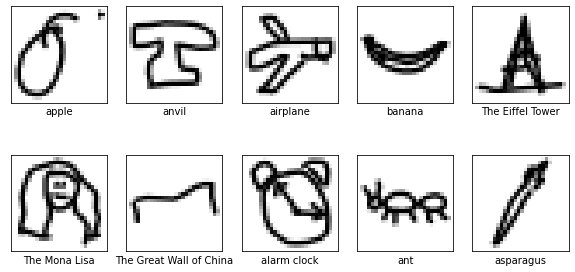

In [96]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
start = 0

for num, name in enumerate(class_names):
    plt.subplot(2,5, num+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[start].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(name)
    start += 10000
plt.show()

In [97]:
# Need this line to randomly shuffle both the X & y at the same time.

from sklearn.utils import shuffle
X, y = shuffle(X, y)

In [98]:
#look at shapes of original data
X.shape

(100000, 784)

In [99]:
y.shape

(100000,)

In [100]:
#import train_test_split, will help with creating
#the training and testing sets
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [102]:
X_train.shape,X_test.shape

((67000, 784), (33000, 784))

## Build Your Baseline Model
Some Hints:


*  Model should have 784 input values (like mnist)
*  Use `sparse_categorical_crossentropy` as your loss function.
* You need 10 neurons in your last layer for output
* You can add as many hidden layers with as many neurons in them as you like. 
* Limit your model epochs to 30 each time you fit.
* You can use the `validation_split` command to automatically create a training / validation dataset.  Specify a percentage such as .2 in your fit statement. 



In [57]:
#import model from tensorflow to construct basemodel
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [58]:
#instantiate Sequential Model
# A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
model = Sequential()

In [59]:
model.add(
    #hidden layer
    Dense(32, activation='relu', input_dim=784))

In [60]:
model.add(
    Dense(10,activation='softmax')
    )

In [61]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [62]:
#compile, and use SGD optimizer 
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics =['accuracy'])

### Visualize the results

Create charts for both loss and accuracy by epoch. Use line graphs for both charts. Analyze the results. 

At what point should we have stopped training the model and why? 

In [66]:
baseline =  model.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test))

Epoch 1/10
2094/2094 [==============================] - 2s 949us/step - loss: 2.3025 - accuracy: 0.1010 - val_loss: 2.3031 - val_accuracy: 0.0987
Epoch 2/10
2094/2094 [==============================] - 2s 747us/step - loss: 2.3024 - accuracy: 0.0990 - val_loss: 2.3031 - val_accuracy: 0.0967
Epoch 3/10
2094/2094 [==============================] - 2s 773us/step - loss: 2.3024 - accuracy: 0.1014 - val_loss: 2.3031 - val_accuracy: 0.0987
Epoch 4/10
2094/2094 [==============================] - 2s 784us/step - loss: 2.3024 - accuracy: 0.1013 - val_loss: 2.3030 - val_accuracy: 0.0967
Epoch 5/10
2094/2094 [==============================] - 2s 818us/step - loss: 2.3024 - accuracy: 0.1013 - val_loss: 2.3030 - val_accuracy: 0.0987
Epoch 6/10
2094/2094 [==============================] - 2s 841us/step - loss: 2.3024 - accuracy: 0.1001 - val_loss: 2.3030 - val_accuracy: 0.0967
Epoch 7/10
2094/2094 [==============================] - 2s 865us/step - loss: 2.3024 - accuracy: 0.1006 - val_loss: 2.3030 -

In [67]:
baseline.history

{'loss': [2.302454948425293,
  2.3024353981018066,
  2.302442789077759,
  2.3024368286132812,
  2.3024280071258545,
  2.3024134635925293,
  2.3024439811706543,
  2.302443504333496,
  2.3024332523345947,
  2.302433490753174],
 'accuracy': [0.10097014904022217,
  0.09897015243768692,
  0.10137313604354858,
  0.10125373303890228,
  0.10132835805416107,
  0.1001492515206337,
  0.1006268635392189,
  0.10035821050405502,
  0.10194029659032822,
  0.09943283349275589],
 'val_loss': [2.303068161010742,
  2.3030576705932617,
  2.303072214126587,
  2.3030242919921875,
  2.3030319213867188,
  2.3030292987823486,
  2.3030483722686768,
  2.303077220916748,
  2.303042411804199,
  2.3030991554260254],
 'val_accuracy': [0.09869696944952011,
  0.09666666388511658,
  0.09869696944952011,
  0.09666666388511658,
  0.09869696944952011,
  0.09666666388511658,
  0.09666666388511658,
  0.09666666388511658,
  0.09869696944952011,
  0.10024242103099823]}

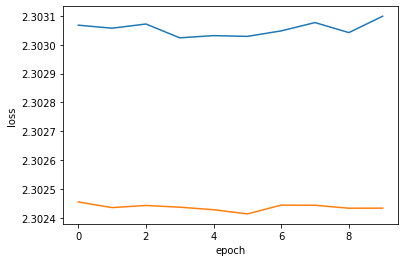

In [89]:
#visualize validation loss for model
import seaborn as sns
import pandas as pd

df = pd.DataFrame.from_records(baseline.history)
df['epoch'] = [i for i in range(df.shape[0])]

ax = sns.lineplot(x='epoch', y='val_loss', data=df)
ax = sns.lineplot(x='epoch', y='loss', data=df);

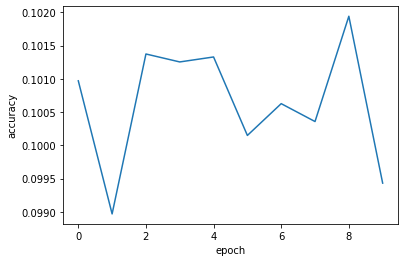

In [90]:
#create visualizations for accuracy

ax = sns.lineplot(x='epoch', y='accuracy', data=df);

## Change Optimizers
Try using the keras `adam` optimizer instead of `sgd` in your model. Visualize the difference in validation loss between the models with different optimizers. 

In [70]:

from tensorflow.keras.optimizers import Adam

adam = Adam()

In [71]:
model2 = Sequential()

In [72]:
model2.add(
    #hidden layer
    Dense(32, activation='relu', input_dim=784))

In [73]:
model2.add(
    Dense(10,activation='softmax')
    )

In [75]:
model2.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics =['accuracy'])

In [77]:
baseline2 = model2.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test))

Epoch 1/10
2094/2094 [==============================] - 2s 872us/step - loss: 2.5656 - accuracy: 0.2650 - val_loss: 1.7269 - val_accuracy: 0.3524
Epoch 2/10
2094/2094 [==============================] - 2s 805us/step - loss: 1.6554 - accuracy: 0.3816 - val_loss: 1.5719 - val_accuracy: 0.4030
Epoch 3/10
2094/2094 [==============================] - 2s 819us/step - loss: 1.4555 - accuracy: 0.4557 - val_loss: 1.3525 - val_accuracy: 0.5078
Epoch 4/10
2094/2094 [==============================] - 2s 827us/step - loss: 1.2739 - accuracy: 0.5261 - val_loss: 1.2703 - val_accuracy: 0.5666
Epoch 5/10
2094/2094 [==============================] - 2s 819us/step - loss: 1.1797 - accuracy: 0.5691 - val_loss: 1.1783 - val_accuracy: 0.5792
Epoch 6/10
2094/2094 [==============================] - 2s 827us/step - loss: 1.1307 - accuracy: 0.5857 - val_loss: 1.1627 - val_accuracy: 0.5886
Epoch 7/10
2094/2094 [==============================] - 2s 842us/step - loss: 1.1123 - accuracy: 0.6041 - val_loss: 1.1426 -

In [80]:
baseline2.history['loss']

[2.5655853748321533,
 1.6554100513458252,
 1.4555377960205078,
 1.273935317993164,
 1.1796956062316895,
 1.1307233572006226,
 1.1123321056365967,
 1.089166283607483,
 1.0550459623336792,
 1.0264040231704712]

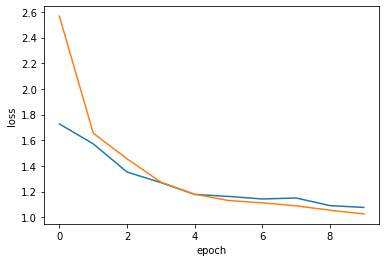

In [87]:
#visualize validation loss for model
import seaborn as sns
import pandas as pd

df2 = pd.DataFrame.from_records(baseline2.history)
df2['epoch'] = [i for i in range(df.shape[0])]

ax = sns.lineplot(x='epoch', y='val_loss', data=df2)
ax = sns.lineplot(x='epoch', y='loss', data=df2);

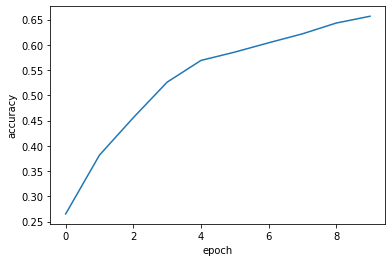

In [88]:
#create visualizations for accuracy

ax = sns.lineplot(x='epoch', y='accuracy', data=df2);

### Additional Written Tasks:
In this section, you will need to search for resources: 
1. Investigate the various [loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses). Which is best suited for the task at hand (predicting 1 / 0) and why? 
    - It is intended for use with binary classification where the target values are in the set {0, 1}.
    - Mathematically, it is the preferred loss function under the inference framework of maximum likelihood
    - https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/
 
 
2. What is the difference between a loss function and a metric? Why might we need both in Keras? 
    - The loss function is used to optimize your model. This is the function that will get minimized by the optimizer.
    - A metric is used to judge the performance of your model. This is only for you to look at and has nothing to do with the optimization process.
    - The metric is important for few Keras callbacks like EarlyStopping when one wants to stop training the model in case the metric isn't improving for a certaining no. of epochs.
    https://stackoverflow.com/questions/48280873/what-is-the-difference-between-loss-function-and-metric-in-keras/48281534#:~:text=The%20loss%20function%20is%20used,do%20with%20the%20optimization%20process.
3. Investigate the various [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers). Stochastic Gradient Descent (`sgd`) is not the learning algorithm dejour anyone. Why is that? What do newer optimizers such as `adam` have to offer? 
    - SGD is a variant of gradient descent. Instead of performing computations on the whole dataset — which is redundant and inefficient — SGD only computes on a small subset or random selection of data examples. SGD produces the same performance as regular gradient descent when the learning rate is low.In the recent years however, a number of new optimizers have been proposed to tackle complex training scenarios where gradient descent methods behave poorly. One of the most widely used and practical optimizers for training deep learning models is Adam.
    https://medium.com/syncedreview/iclr-2019-fast-as-adam-good-as-sgd-new-optimizer-has-both-78e37e8f9a34#:~:text=Essentially%20Adam%20is%20an%20algorithm,learning%20rates%20for%20different%20parameters.
    

## Stretch Goals: 

- Research convolutional neural networks and try including convolution layers in your network.
- Pick two classes and make QuickDraw a binary classification problem, how does your model architecture change?
- Implement Cross Validation model evaluation on your Quickdraw implementation 

Watch some more videos on Gradient Descent:
- [Gradient Descent, Step-by-Step](https://www.youtube.com/watch?v=sDv4f4s2SB8)  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
- [Stochastic Gradient Descent, Clearly Explained!!!](https://www.youtube.com/watch?v=vMh0zPT0tLI) by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
- [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)